In [1]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud

# Set a consistent style for our plots
sns.set_style('darkgrid')
print("Library Imported")

Library Imported


In [2]:
!git clone "https://github.com/GeeksforgeeksDS/21-Days-21-Projects-Dataset"
print("Datasets Downloaded")

Datasets Downloaded


fatal: destination path '21-Days-21-Projects-Dataset' already exists and is not an empty directory.


In [3]:
print("Loading Dataset")
df = pd.read_csv("21-Days-21-Projects-Dataset/Datasets/netflix_titles.csv")
df.head()

Loading Dataset


,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,TV Show,3%,NaN,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,"August 14, 2020",2020,TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...
1,s2,Movie,7:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,"December 23, 2016",2016,TV-MA,93 min,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...
2,s3,Movie,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,"December 20, 2018",2011,R,78 min,"Horror Movies, International Movies","When an army recruit is found dead, his fellow..."
3,s4,Movie,9,Shane Acker,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,"November 16, 2017",2009,PG-13,80 min,"Action & Adventure, Independent Movies, Sci-Fi...","In a postapocalyptic world, rag-doll robots hi..."
4,s5,Movie,21,Robert Luketic,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,"January 1, 2020",2008,PG-13,123 min,Dramas,A brilliant group of students become card-coun...


In [4]:
print("Retrieving info about dataset")
print(df.shape)
df.info()

Retrieving info about dataset
(7787, 12)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7787 entries, 0 to 7786
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       7787 non-null   object
 1   type          7787 non-null   object
 2   title         7787 non-null   object
 3   director      5398 non-null   object
 4   cast          7069 non-null   object
 5   country       7280 non-null   object
 6   date_added    7777 non-null   object
 7   release_year  7787 non-null   int64 
 8   rating        7780 non-null   object
 9   duration      7787 non-null   object
 10  listed_in     7787 non-null   object
 11  description   7787 non-null   object
dtypes: int64(1), object(11)
memory usage: 730.2+ KB


### Inference:
- 7787 rows found with 12 features
- need to convert date_added from string to date data type for analysis
- missing values found in director, cast, country, date_addded, rating

### Data Cleaning

In [5]:
df['director'] = df['director'].fillna('Unknown')
df['cast'] = df['cast'].fillna('Unknown')
df['country']= df['country'].fillna(df['country'].mode()[0])
df.dropna(subset=['date_added','rating'], inplace=True)
print("Missing values filled")

Missing values filled


In [6]:
df['date_added'] = pd.to_datetime(df['date_added'],format='mixed',dayfirst=False)
df['year_added'] = df['date_added'].dt.year 
df['month_added'] = df['date_added'].dt.month_name()

In [7]:
# Verify our cleaning and transformation
print("Missing values after cleaning:")
print(df.isnull().sum())
print("\nData types after transformation:")
print(df.dtypes)

Missing values after cleaning:
show_id         0
type            0
title           0
director        0
cast            0
country         0
date_added      0
release_year    0
rating          0
duration        0
listed_in       0
description     0
year_added      0
month_added     0
dtype: int64

Data types after transformation:
show_id                 object
type                    object
title                   object
director                object
cast                    object
country                 object
date_added      datetime64[ns]
release_year             int64
rating                  object
duration                object
listed_in               object
description             object
year_added               int32
month_added             object
dtype: object


### EDA : Deep dive

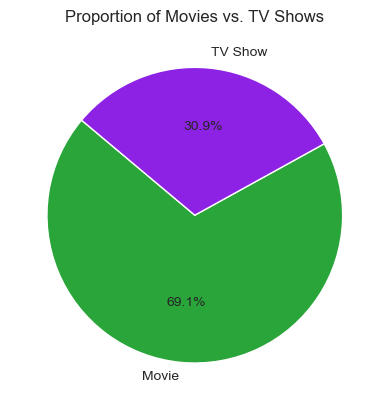

In [8]:
## distribution of content type
# plt.figure(figsize=(8, 6))
type_counts = df['type'].value_counts()
plt.pie(type_counts, labels=type_counts.index, autopct='%1.1f%%', startangle=140, colors=["#2aa53a", "#8d22e4"])
plt.title('Proportion of Movies vs. TV Shows')
plt.ylabel('')
plt.show()

#### Inference:
- major part (~70%) of netflix consists of movies

<Figure size 1400x800 with 0 Axes>

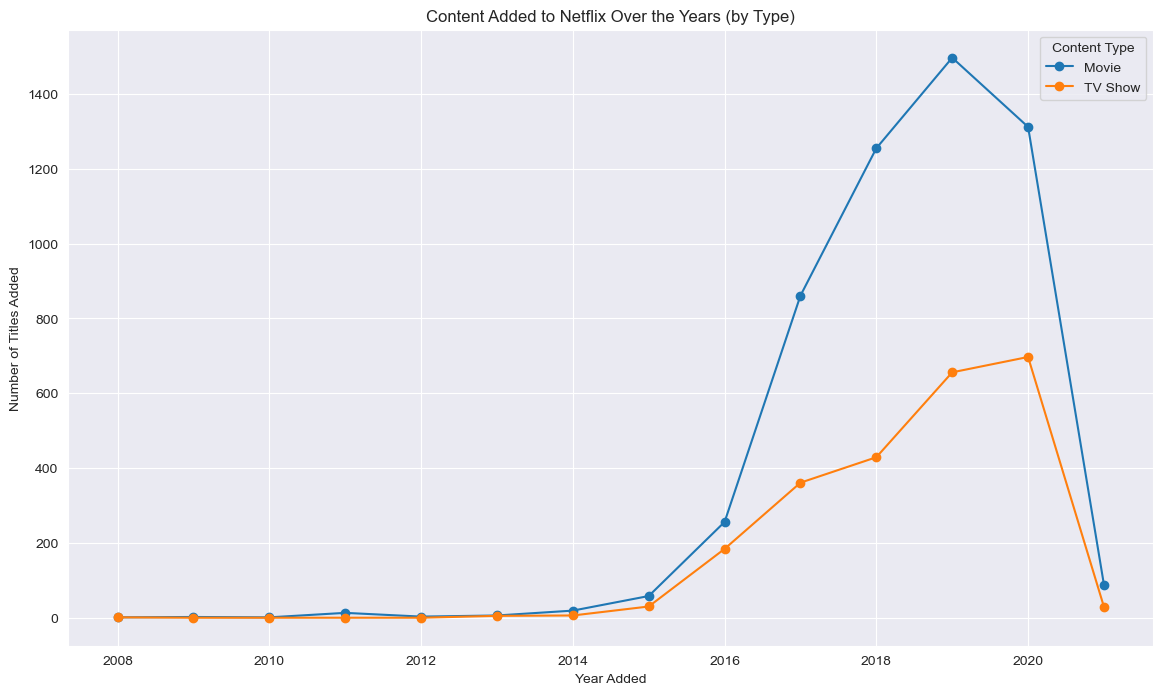

In [9]:
## Addition of content - past trends
content_over_time = df.groupby(['year_added', 'type']).size().unstack().fillna(0)

plt.figure(figsize=(14, 8))
content_over_time.plot(kind='line', marker='o', figsize=(14, 8))
plt.title('Content Added to Netflix Over the Years (by Type)')
plt.xlabel('Year Added')
plt.ylabel('Number of Titles Added')
plt.legend(title='Content Type')
plt.grid(True)
plt.show()

### Find most Popular Genre

In [10]:
# Handling columns with multiple values
# here, we are creating a new dataframe 'genres' where each genre from the 'listed_in' column is split into separate rows
genres = df.assign(genre=df['listed_in'].str.split(', ')).explode('genre')
genres.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,year_added,month_added,genre
0,s1,TV Show,3%,Unknown,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,2020-08-14,2020,TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...,2020,August,International TV Shows
0,s1,TV Show,3%,Unknown,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,2020-08-14,2020,TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...,2020,August,TV Dramas
0,s1,TV Show,3%,Unknown,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,2020-08-14,2020,TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...,2020,August,TV Sci-Fi & Fantasy
1,s2,Movie,7:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,2016-12-23,2016,TV-MA,93 min,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...,2016,December,Dramas
1,s2,Movie,7:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,2016-12-23,2016,TV-MA,93 min,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...,2016,December,International Movies


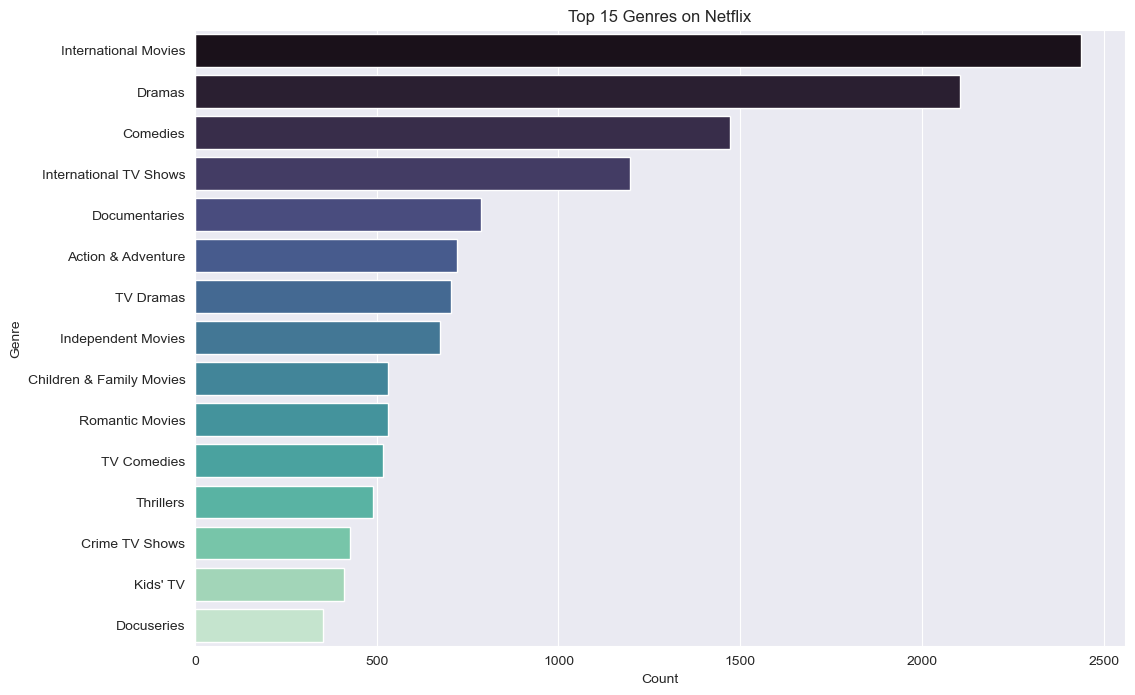

In [15]:
# Get the top 15 genres and their counts
top_genres_counts = genres['genre'].value_counts().reset_index()
top_genres_counts.columns = ['genre', 'count'] # Rename columns for clarity

# Select only the top 15 for plotting
top_genres_counts_plot = top_genres_counts.head(15)

plt.figure(figsize=(12, 8))
sns.barplot(y='genre', x='count', data=top_genres_counts_plot, palette='mako', hue='genre', legend=False)
plt.title('Top 15 Genres on Netflix')
plt.xlabel('Count')
plt.ylabel('Genre')
plt.show()

### Inference:
- "International Movies" is the most common genre tag, highlighting Netflix's global content strategy. 
- This is followed by Dramas, Comedies, and Action & Adventure.

### Distribution of Duration of content 

In [16]:
# Separate movies and TV shows
movies_df = df[df['type'] == 'Movie'].copy()
tv_shows_df = df[df['type'] == 'TV Show'].copy()

In [17]:
# Clean and convert duration for movies
movies_df['duration_min'] = movies_df['duration'].str.replace(' min', '').astype(int)

# Clean and convert duration for TV shows
tv_shows_df['seasons'] = tv_shows_df['duration'].str.replace(' Seasons', '').str.replace(' Season', '').astype(int)

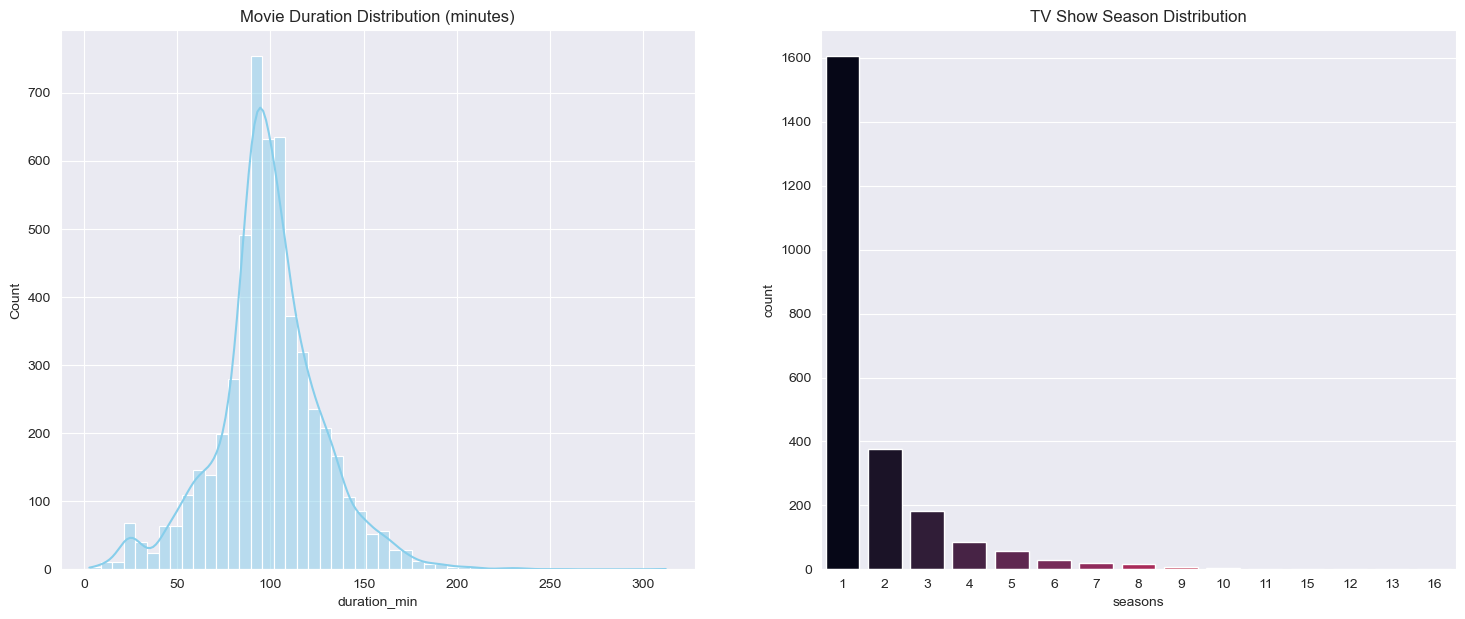

In [18]:
# Plot the distributions
fig, axes = plt.subplots(1, 2, figsize=(18, 7))

# Movie Duration Distribution
sns.histplot(ax=axes[0], data=movies_df, x='duration_min', bins=50, kde=True, color='skyblue').set_title('Movie Duration Distribution (minutes)')

# TV Show Season Distribution
sns.countplot(ax=axes[1], x='seasons', data=tv_shows_df, palette='rocket', order=tv_shows_df['seasons'].value_counts().index, hue='seasons', legend=False).set_title('TV Show Season Distribution')

plt.show()

### Inference:
- Major movies have a duration of 80 - 120 minutes.
- Major TV shows have only 1 season while a few has >=15.

### Where does the content come from? (Geographical Analysis)

In [19]:
# Handle the multi-country listings similar to genres
countries = df.assign(country=df['country'].str.split(', ')).explode('country')


# Get the top 15 countries and their counts
top_countries_counts = countries['country'].value_counts().reset_index()
top_countries_counts.columns = ['country', 'count'] # Rename columns for clarity

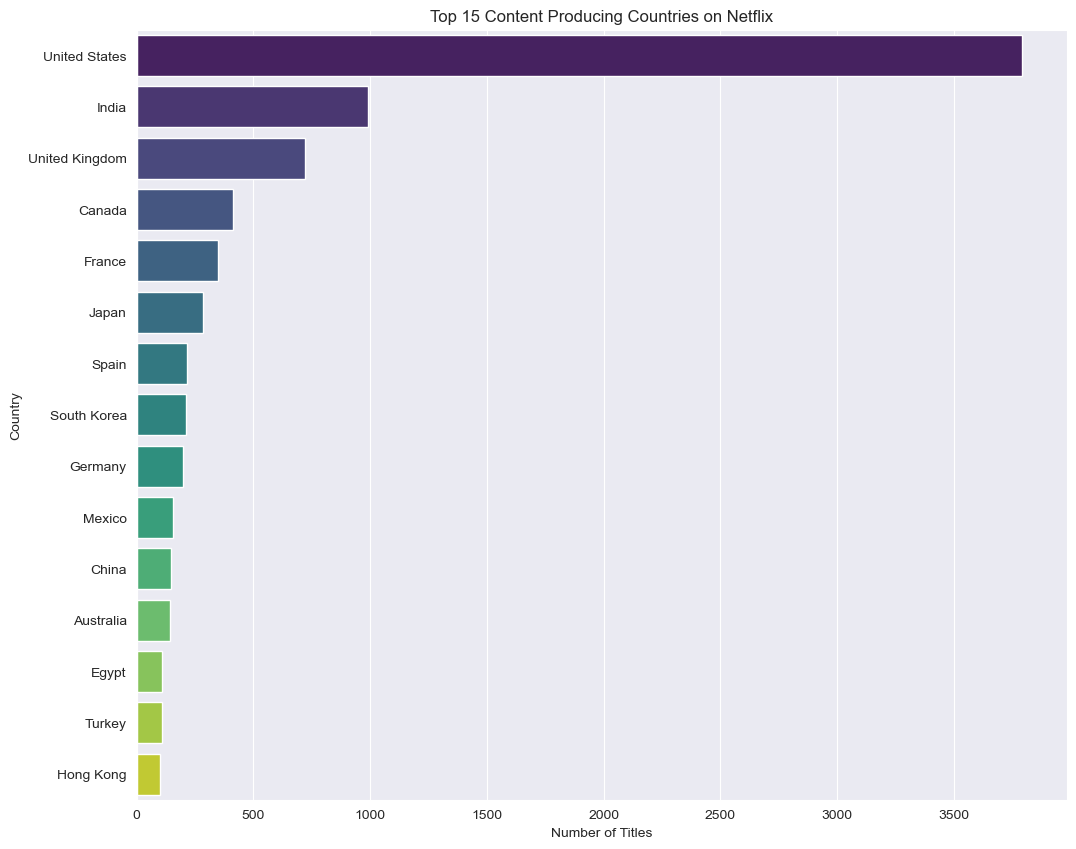

In [20]:
# Select only the top 15 for plotting
top_countries_counts_plot = top_countries_counts.head(15)

plt.figure(figsize=(12, 10))
sns.barplot(y='country', x='count', data=top_countries_counts_plot, palette='viridis', hue='country', legend=False)
plt.title('Top 15 Content Producing Countries on Netflix')
plt.xlabel('Number of Titles')
plt.ylabel('Country')
plt.show()

### Inference:
- USA is the largest producer of Netflix content.
- India stands the second position after US.

### maturity ratings of the content

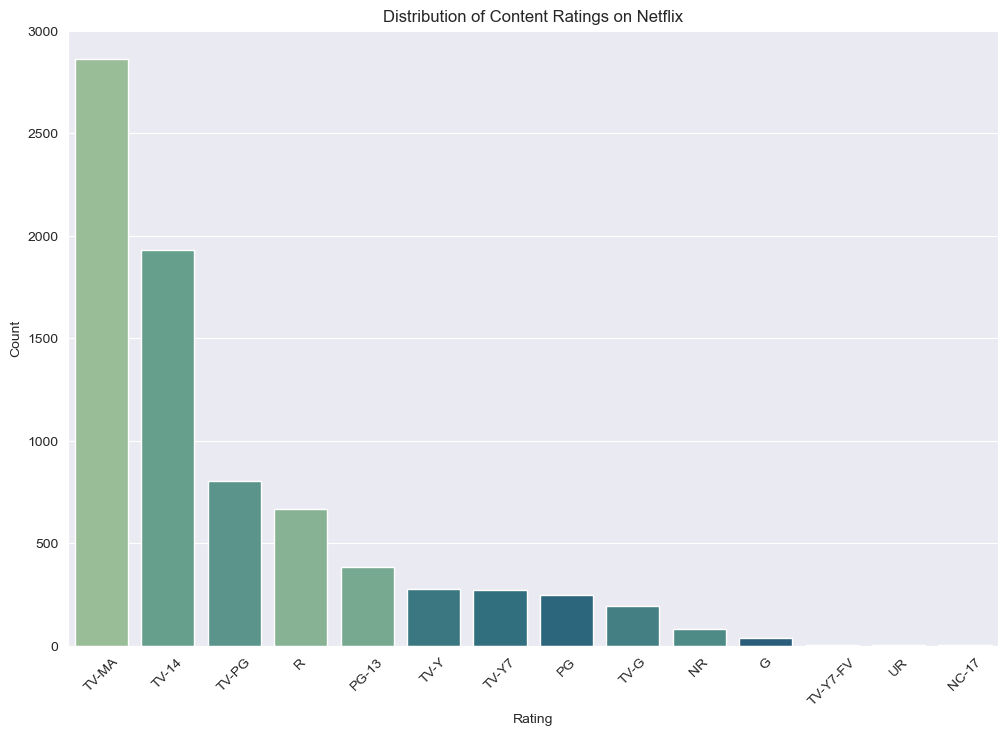

In [22]:
plt.figure(figsize=(12, 8))
sns.countplot(x='rating', data=df, order=df['rating'].value_counts().index, palette='crest', hue='rating', legend=False)
plt.title('Distribution of Content Ratings on Netflix')
plt.xlabel('Rating')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

### Inference:
- Most Netflix content is for mature audiences.
- The most common ratings are TV-MA (Mature Audience) and TV-14 (Parents Strongly Cautioned).

## Feature Engineering

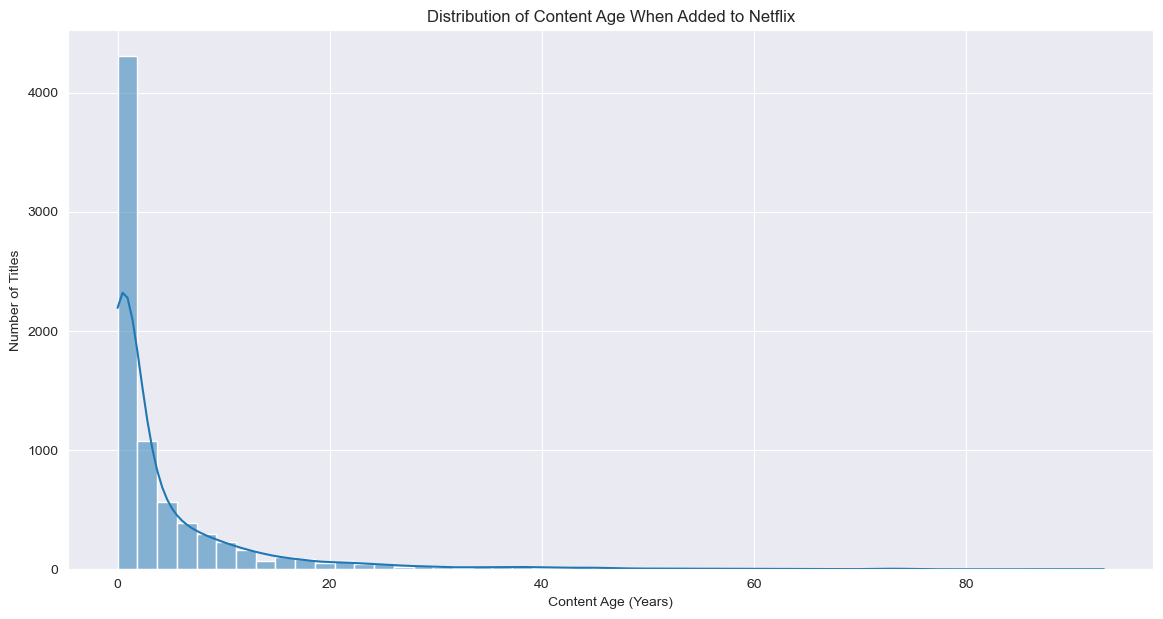

In [23]:
# Content Freshness
# Create the 'age_on_netflix' feature
df['age_on_netflix'] = df['year_added'] - df['release_year']
content_age = df[df['age_on_netflix'] >= 0]

plt.figure(figsize=(14, 7))
sns.histplot(data=content_age, x='age_on_netflix', bins=50, kde=True)
plt.title('Distribution of Content Age When Added to Netflix')
plt.xlabel('Content Age (Years)')
plt.ylabel('Number of Titles')
plt.show()

### Inference:
- Lots of content is added the same year it’s released.
- TLong tail -> Netflix adds many older, licensed movies and shows to build a large library.

### Multivariate Analysis

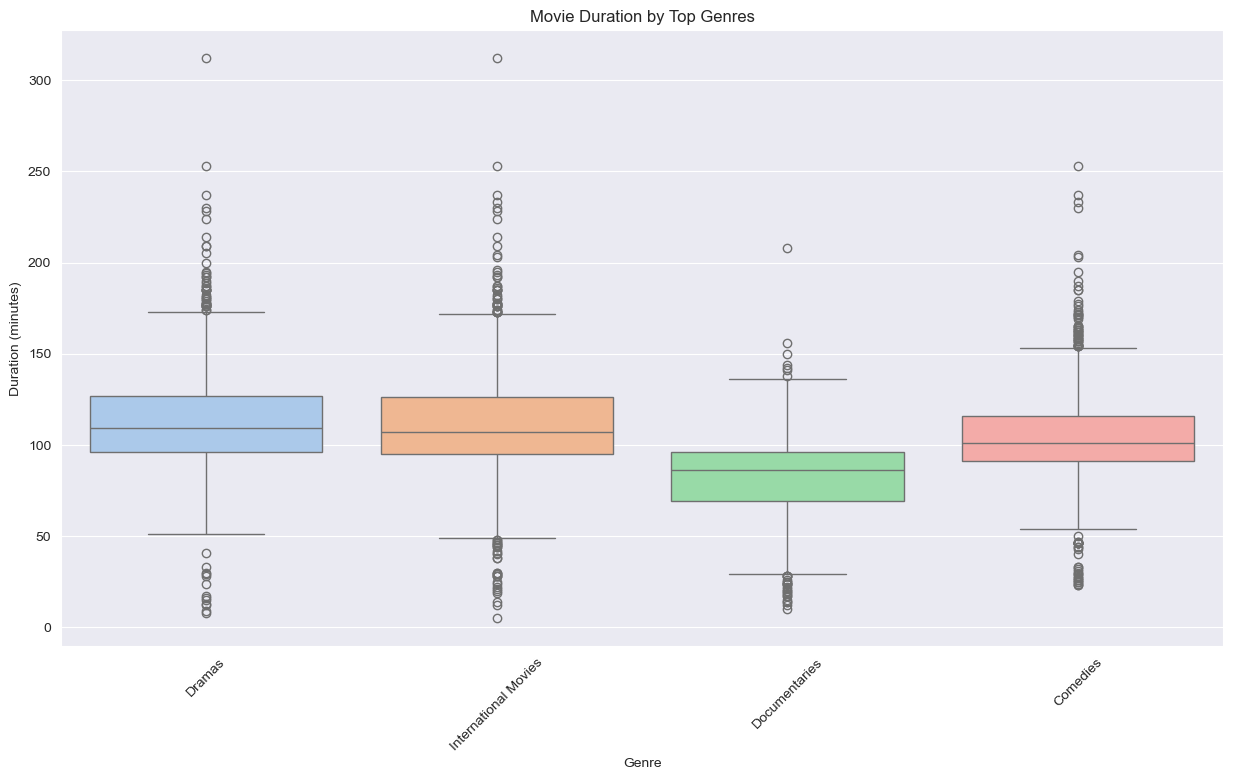

In [24]:
# movie duration vs top genres
top_genres = genres['genre'].value_counts().index[:5]
genres_movies = genres[(genres['type'] == 'Movie') & (genres['genre'].isin(top_genres))].copy()
genres_movies['duration_min'] = genres_movies['duration'].str.replace(' min', '').astype(int)

plt.figure(figsize=(15, 8))
sns.boxplot(data=genres_movies, x='genre', y='duration_min', palette='pastel', hue='genre', legend=False)
plt.title('Movie Duration by Top Genres')
plt.xlabel('Genre')
plt.ylabel('Duration (minutes)')
plt.xticks(rotation=45)
plt.show()

### Inference:
- While the median of duration floats around 90-110 minutes, we can see the diversification among drama comminities and Internatoinal movies, consisting few minutes to >4 hours of content.

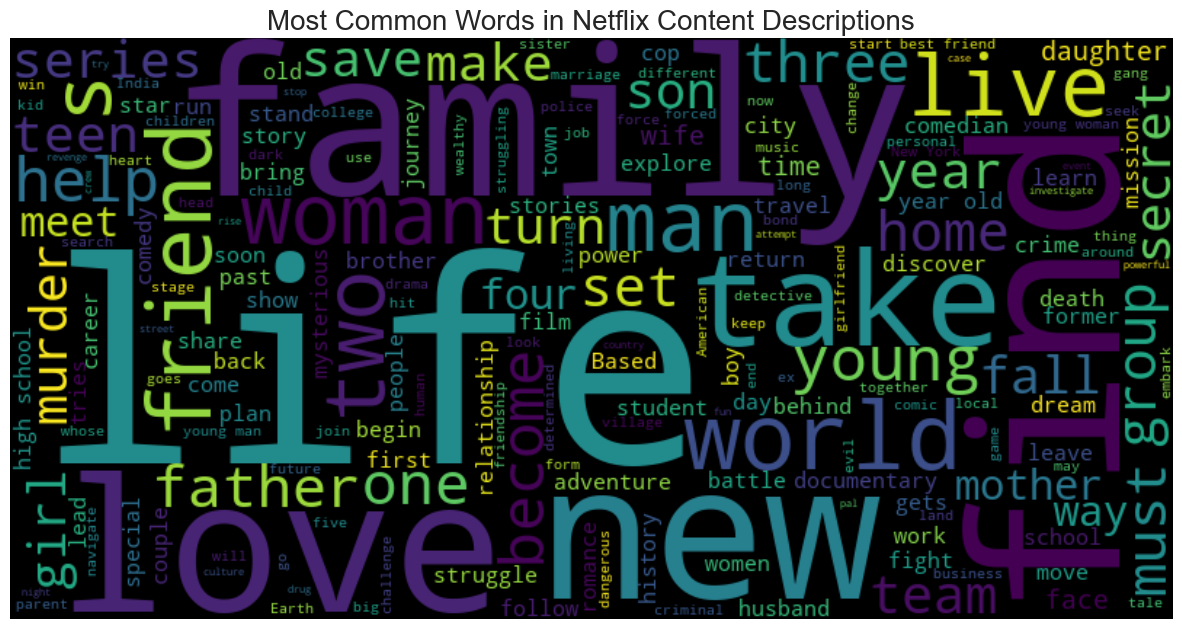

In [25]:
# Combine all descriptions into a single string
text = ' '.join(df['description'])

# Create and generate a word cloud image
wordcloud = WordCloud(width=800, height=400, background_color='black').generate(text)

# Display the generated image
plt.figure(figsize=(15, 10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Most Common Words in Netflix Content Descriptions', fontsize=20)
plt.show()

- love, family, life , new, find are most occurung word in description, mentioning Netflix mostly target towards emotion attachemnt.

## Tasks for Submission

### How has the distribution of content ratings changed over time?

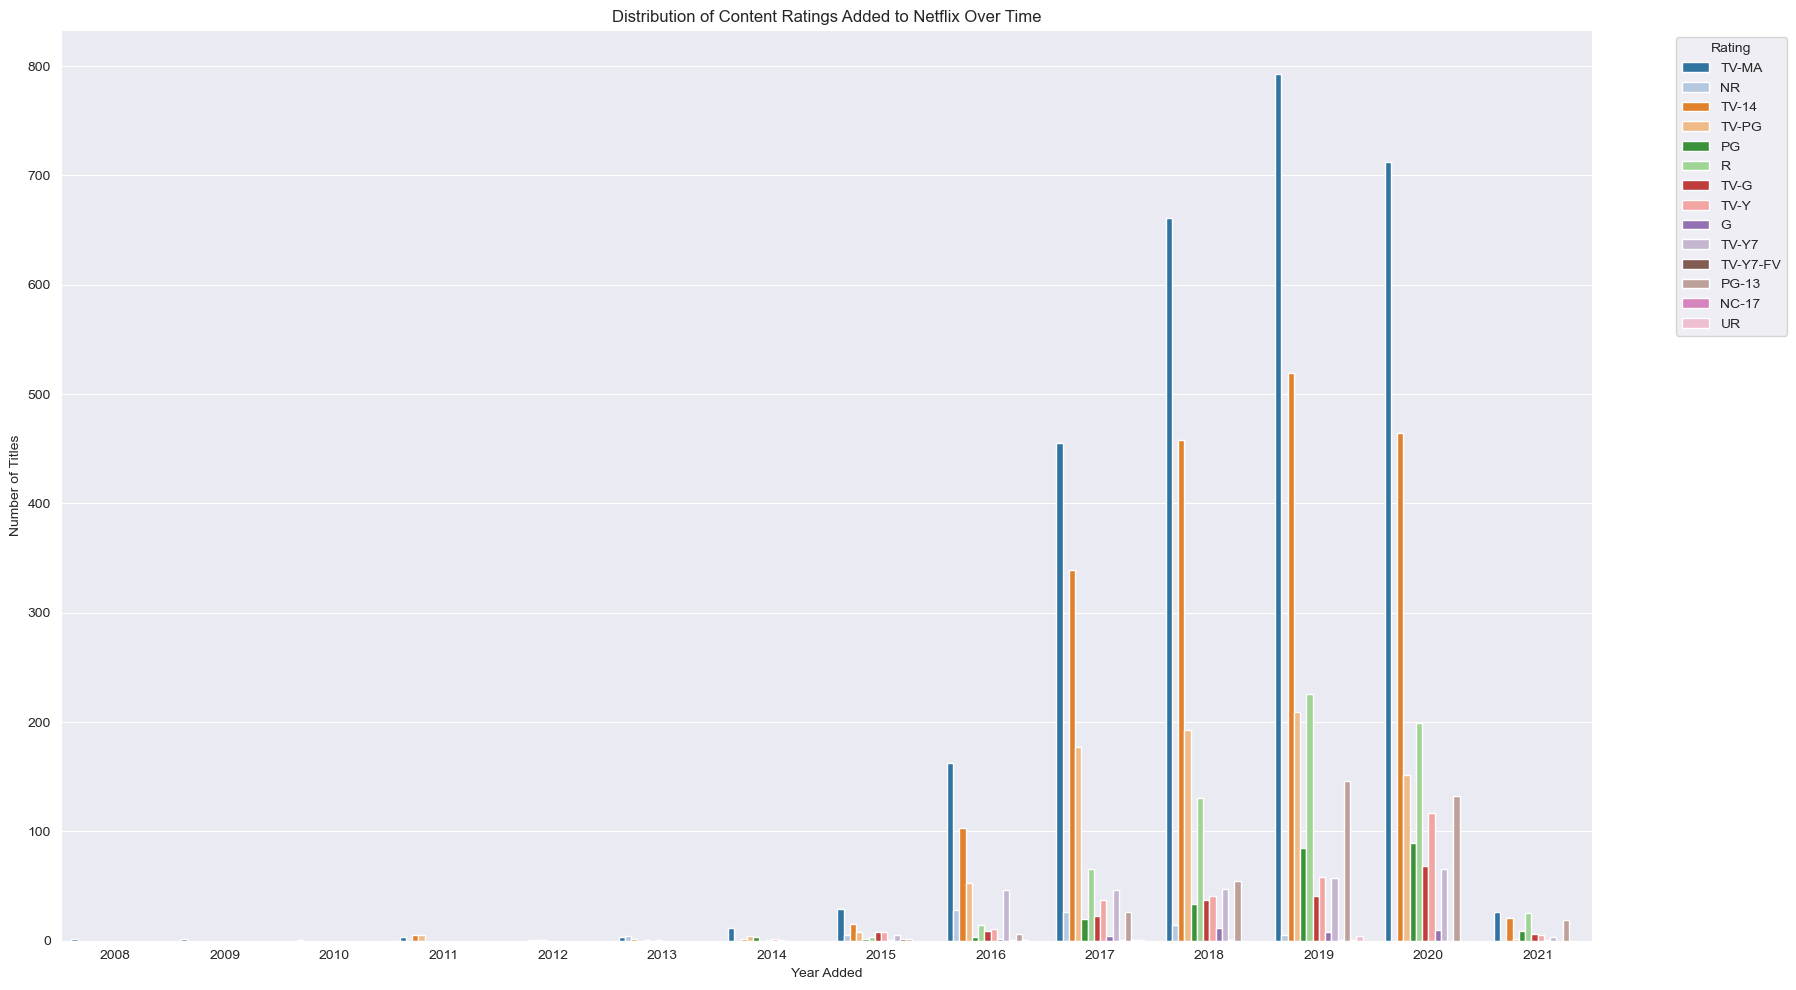

In [27]:
plt.figure(figsize=(18, 10))
sns.countplot(data=df, x='year_added', hue='rating', order=sorted(df['year_added'].dropna().unique()), palette='tab20')
plt.title('Distribution of Content Ratings Added to Netflix Over Time')
plt.xlabel('Year Added')
plt.ylabel('Number of Titles')
plt.legend(title='Rating', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

### Inference:
- Rating seems to have an increasing trend over time.
- Since the data is from early 2021, it contains less data. 
- 2020 shows a dip, which might be due to some reason related to COVID-19

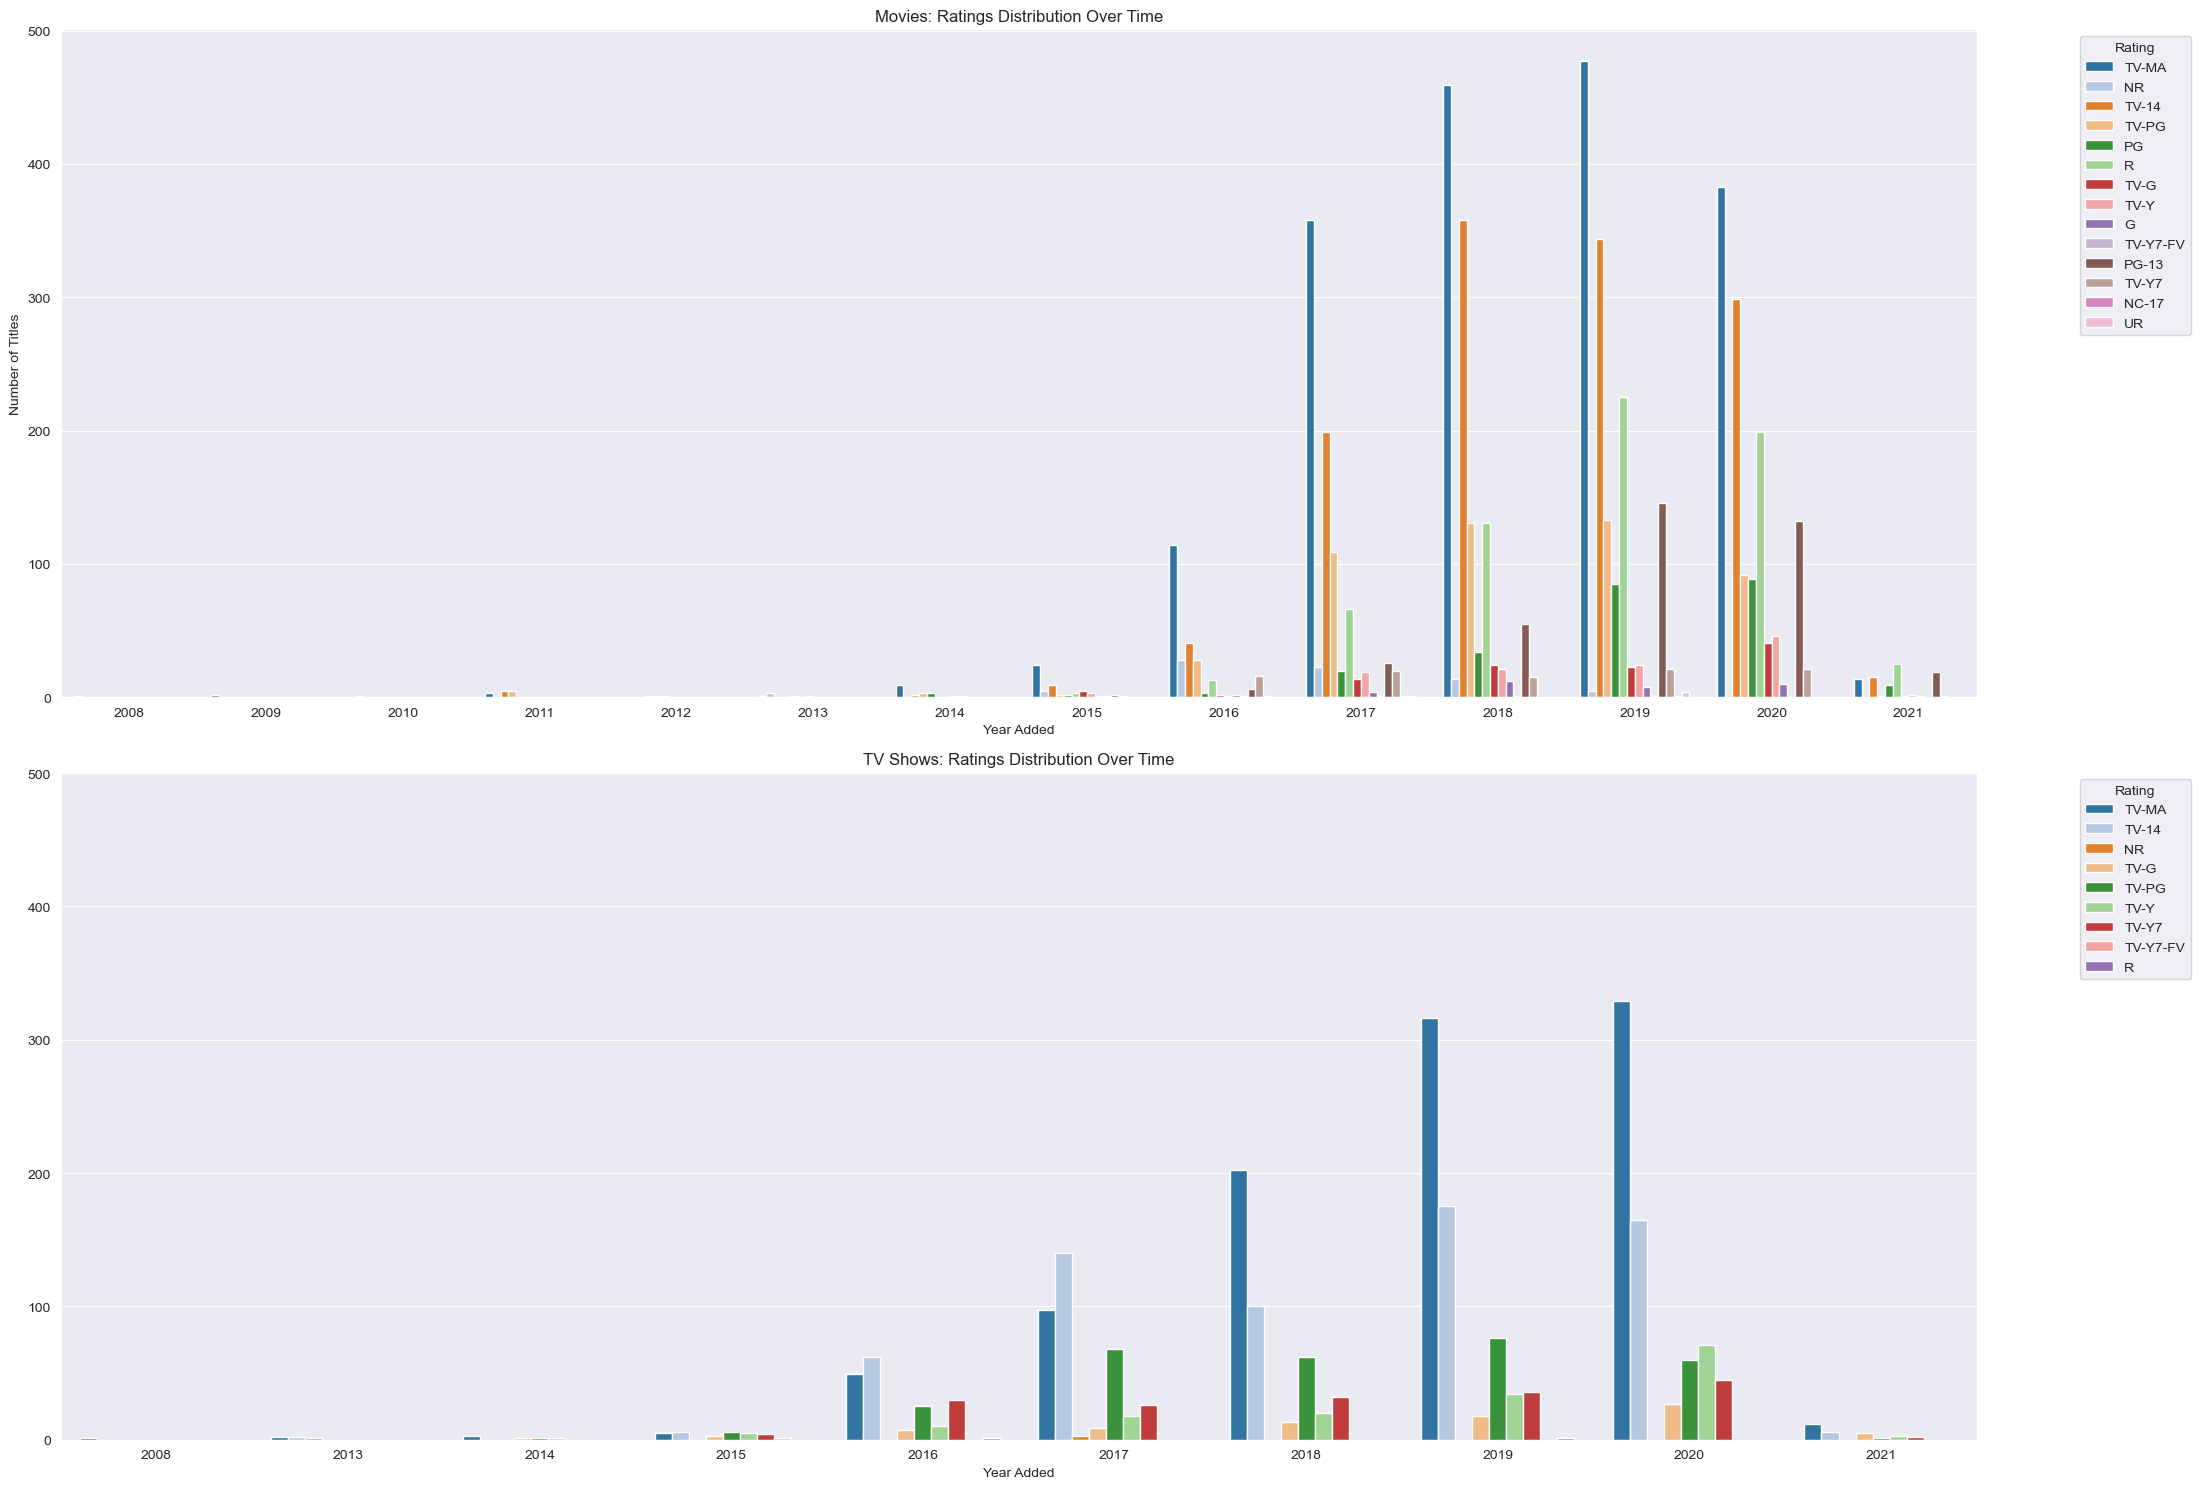

In [28]:
fig, axes = plt.subplots(2, 1, figsize=(22, 15), sharey=True)

# Movies subplot
sns.countplot(
    data=movies_df,
    x='year_added',
    hue='rating',
    order=sorted(movies_df['year_added'].dropna().unique()),
    palette='tab20',
    ax=axes[0]
)
axes[0].set_title('Movies: Ratings Distribution Over Time')
axes[0].set_xlabel('Year Added')
axes[0].set_ylabel('Number of Titles')
axes[0].legend(title='Rating', bbox_to_anchor=(1.05, 1), loc='upper left')

# TV Shows subplot
sns.countplot(
    data=tv_shows_df,
    x='year_added',
    hue='rating',
    order=sorted(tv_shows_df['year_added'].dropna().unique()),
    palette='tab20',
    ax=axes[1]
)
axes[1].set_title('TV Shows: Ratings Distribution Over Time')
axes[1].set_xlabel('Year Added')
axes[1].set_ylabel('')

axes[1].legend(title='Rating', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

### Inference:
- Increase in Mature content over the years (TV-MA)
- For most years (exception being 2011-2013), Netflix added in more movies in the mature content (TV-MA) category than any other rating.
- Similar distribution seen in series too - but 2015-2017 period saw a higher number of TV-14 than TV-MA series

### Is there a relationship between content age and its type (Movie vs. TV Show)?

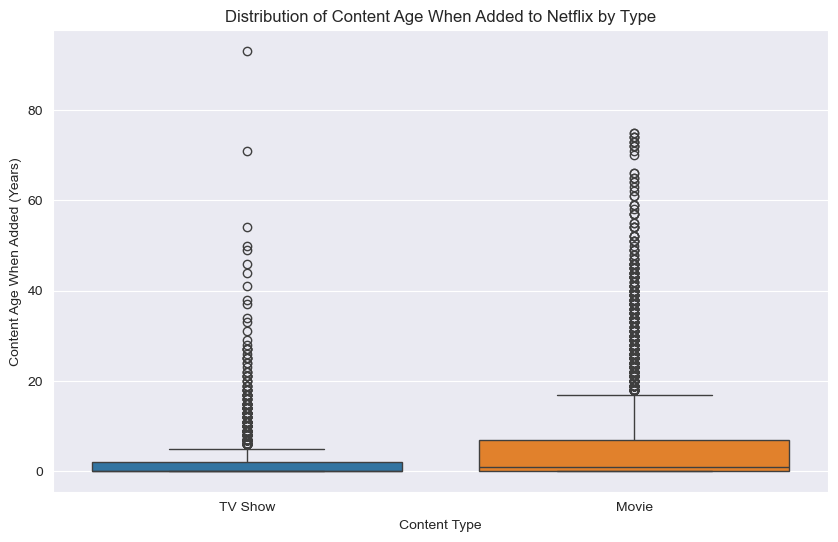

In [29]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=content_age, x='type', y='age_on_netflix', hue='type')
plt.title('Distribution of Content Age When Added to Netflix by Type')
plt.xlabel('Content Type')
plt.ylabel('Content Age When Added (Years)')
plt.show()

- Netflix tends to add in newer shows and movies as we saw above before.
- Most movies tend to be between the age 0 to 10 years, whereas most shows tend to be between the age 0 to 5 years
- However, there are quite a few series and movies that do not follow this rule
  - TV shows that are added in, span a larger age range than movies: with the farthest outlier being over 80 years old
  - Though, the number of TV shows added outside the general age-range is lesser. Meaning: Netflix is more likely to add in older movies than older TV shows

### Can we identify any trends in content production based on the release year vs. the year added to Netflix?

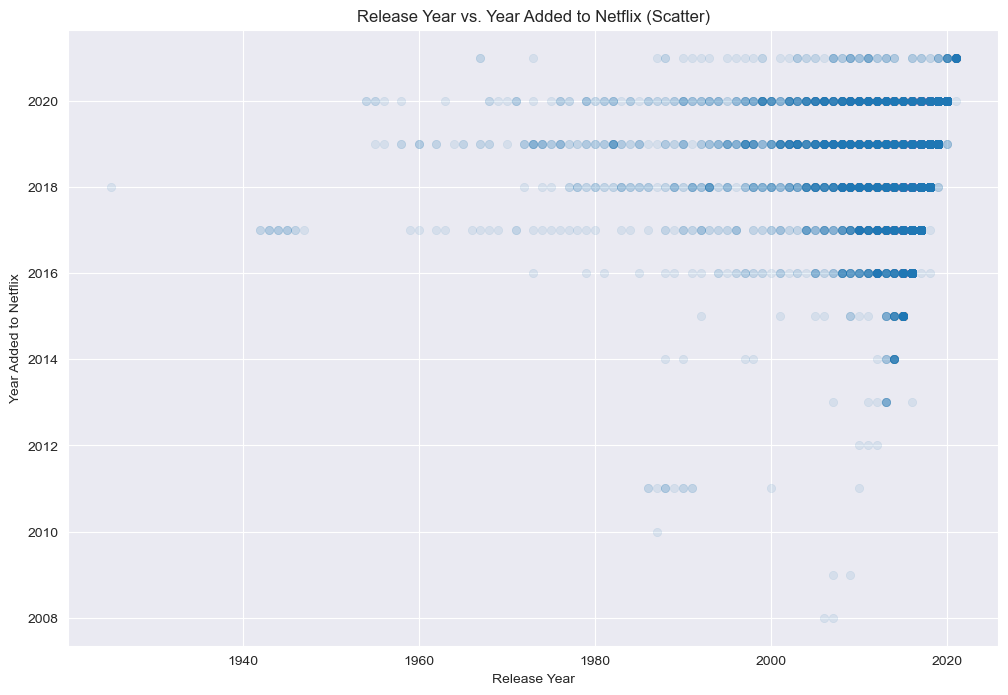

In [30]:
plt.figure(figsize=(12, 8))
sns.scatterplot(
    data=df, x='release_year', y='year_added',
    alpha=0.1, edgecolor=None
)
plt.xlabel('Release Year')
plt.ylabel('Year Added to Netflix')
plt.title('Release Year vs. Year Added to Netflix (Scatter)')
plt.show()

### Inference:
- Most years netflix added in shows and movies that were recently released
- Netflix added in more older shows between the years 2018 and 2020

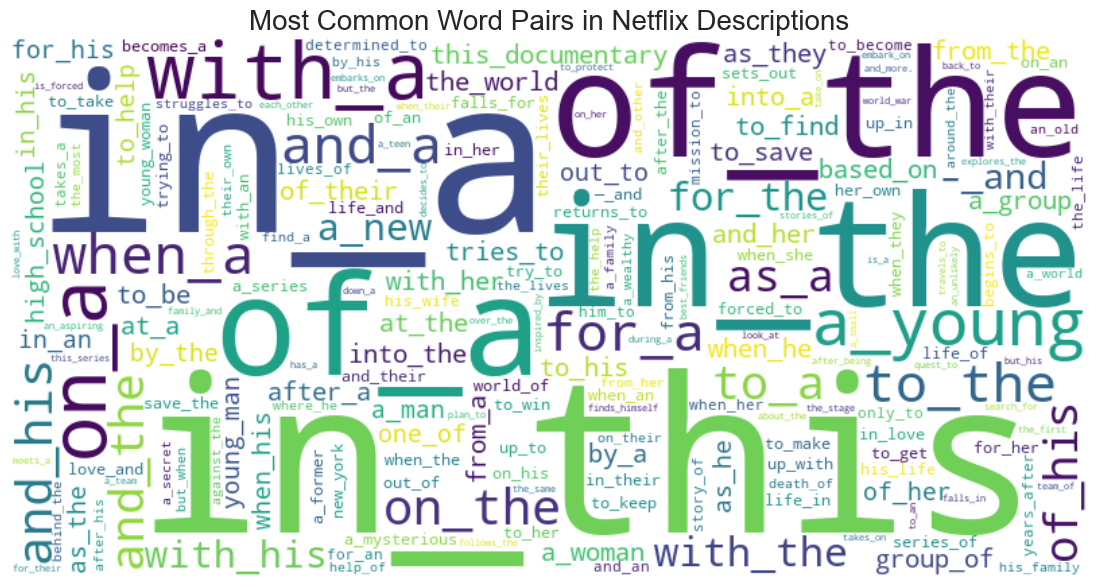

In [32]:
from collections import Counter

# Prepare bigrams from all descriptions
all_words = ' '.join(df['description'].dropna()).lower().split()
bigrams = ['_'.join([all_words[i], all_words[i+1]]) for i in range(len(all_words)-1)]

# Count bigram frequencies
bigram_counts = Counter(bigrams)

# Generate a word cloud for bigrams
bigram_wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(bigram_counts)

plt.figure(figsize=(15, 7))
plt.imshow(bigram_wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Most Common Word Pairs in Netflix Descriptions', fontsize=20)
plt.show()

- Most occuring words/phrases are the words that generally doesnt make any stand alone emotion

### Who are the top directors on Netflix?

C:\Users\bikas\AppData\Local\Temp\ipykernel_16956\3687612724.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y='Director', x='Number of Titles', data=top_directors.head(20), palette='flare')


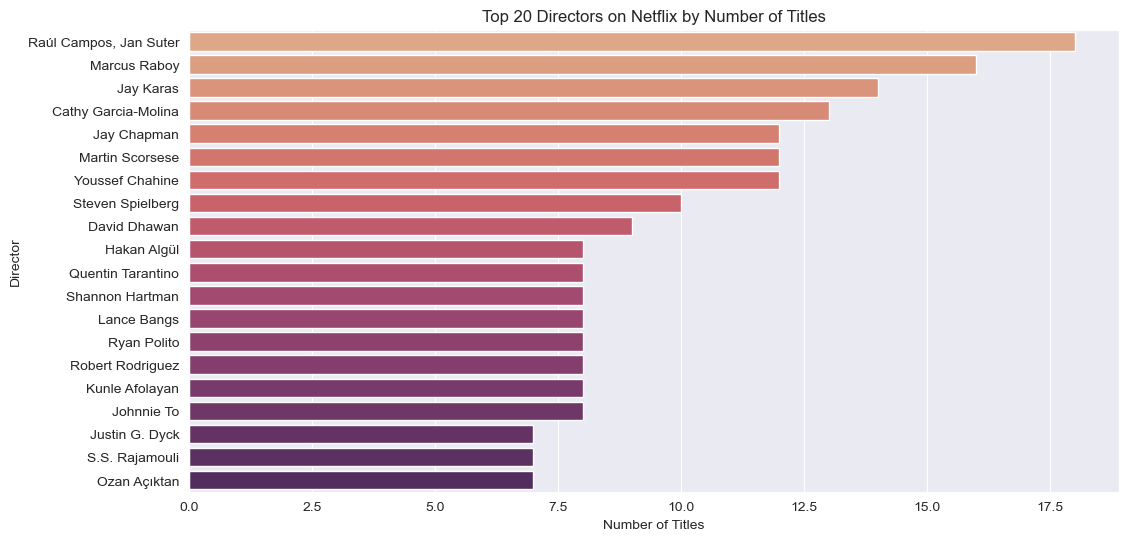

In [33]:
top_directors = (
    df[df['director'] != 'Unknown']['director']
    .value_counts()
    .head(50)
    .reset_index()
)
top_directors.columns = ['Director', 'Number of Titles']

plt.figure(figsize=(12, 6))
sns.barplot(y='Director', x='Number of Titles', data=top_directors.head(20), palette='flare')
plt.title('Top 20 Directors on Netflix by Number of Titles')
plt.xlabel('Number of Titles')
plt.ylabel('Director')
plt.show()

- The director pair: Raúl Campos and Jan Suter have the most number of titles